1\. Write a function that converts number representation (bin<->dec<->hex)

In [1]:
print("\n\nEs 1\n")

# RICORDO: se converto da intero a binario o esadecimale,
# quello che si ottiene e` una stringa!
# quindi il returntype della funzione che ritorna la
# rappresentazione binaria del numero e` string

def convertToBinary(n):
    strRet = bin(n)
    return strRet
#enddef

def convertBinary(n):
    tmp = n
    listBin = []
    while tmp != 0:
        if tmp%2 == 0:
            listBin.append('0')
            tmp = tmp // 2
        elif tmp%2 != 0:
            listBin.append('1')
            tmp = tmp // 2
        #endif
    #enddo
    listBin.reverse()
    strBin = ''.join(listBin)
    return strBin
#enddef
 

n = 1993
print("Intero n = ", n)
print("Rappresentazione di n in binario = ", convertToBinary(n))
#print(n)
print("Rappresentazione di n in binario = ", convertBinary(n))

# altrimenti
print("Rappresentazione in binario {0:08b}".format(n))
print(n) # sinceriamoci che la funzione non abbia alterato il valore di n



Es 1

Intero n =  1993
Rappresentazione di n in binario =  0b11111001001
Rappresentazione di n in binario =  11111001001
Rappresentazione in binario 11111001001
1993


2\. Write a function that converts a 32 bit word into a single precision floating point (i.e. interprets the various bits as sign, mantissa and exponent)

In [2]:
print("\n\nEs 2\n")

strInt = '00110111001000100010111000110011'
strInt = '00000011111000000000000000000000'
print(len(strInt))

print(type(strInt[0:22+1]))

f = int( strInt[0:22+1] , 2 )
e = int( strInt[23:30+1] , 2 )
s = int( strInt[31] , 2)

xFloat = (-1)**2 * (1 + 0.1 * f) * 2**(e - 127)
print(xFloat)



Es 2

32
<class 'str'>
7.46356628167595e-35


3\. Write a program to determine the underflow and overflow limits (within a factor of 2) for python on your computer. 

**Tips**: define two variables inizialized to 1 and halve/double them enough time to exceed the under/over-flow limits  

4\. Write a program to determine the machine precision

**Tips**: define a new variable by adding a smaller and smaller value (proceeding similarly to prob. 2) to an original variable and check the point where the two are the same 

In order to determine the machine precision, an incremental difference between tho numbers in computed as $ m^{(i)} \frac{N - m^{(i-1)}}{2} $ and then the difference $\Delta = N - (m^{(i)} = m^{(i-1)})$ is compared to the test tolerance $\epsilon = 10^{-n}$ with $n = 10, \dots 20$. As long as $\Delta > \epsilon$, machine precision is not attained. Susequently, values are observed. As $m^{(i)}$ does not change any further, machine precision is given by the respective key in the dictionary collecting such values.

In [1]:
dict = {}

def determineMP(n):
    eps = 1 * 10**(-n)
    N = 10
    m = 9
    Delta = N - m
    while (Delta > eps):
        tmp = (N - m)/2
        Delta = N - (m + tmp)
        m += tmp
        #print(tmp)
    #enddo
    return tmp
#enddef

for n in range(10,21):
    #print("Test n = ", n)
    t = determineMP(n)
    dict.update({n : t})
#enddo

for i in dict.keys():
    print("eps = 10^-(",i,"), tol = ", dict[i])
#enddo


eps = 10^-( 10 ), tol =  5.820766091346741e-11
eps = 10^-( 11 ), tol =  7.275957614183426e-12
eps = 10^-( 12 ), tol =  9.094947017729282e-13
eps = 10^-( 13 ), tol =  5.684341886080802e-14
eps = 10^-( 14 ), tol =  7.105427357601002e-15
eps = 10^-( 15 ), tol =  8.881784197001252e-16
eps = 10^-( 16 ), tol =  8.881784197001252e-16
eps = 10^-( 17 ), tol =  8.881784197001252e-16
eps = 10^-( 18 ), tol =  8.881784197001252e-16
eps = 10^-( 19 ), tol =  8.881784197001252e-16
eps = 10^-( 20 ), tol =  8.881784197001252e-16


**RISPOSTA**: La precisione della macchina (Fujitsu dfa021, Memoria: 7.6 GiB, Processore: Intel® Core™ i5-7400 CPU @ 3.00GHz × 4) e` 
$10^{-16}$

5\. Write a function that takes in input three parameters $a$, $b$ and $c$ and prints out the two solutions to the quadratic equation $ax^2+bx+c=0$ using the standard formula:
$$
x=\frac{-b\pm\sqrt{b^2-4ac}}{2a}
$$

(a) use the program to compute the solution for $a=0.001$, $b=1000$ and $c=0.001$

(b) re-express the standard solution formula by multiplying top and bottom by $-b\mp\sqrt{b^2-4ac}$ and again find the solution for $a=0.001$, $b=1000$ and $c=0.001$. How does it compare with what previously obtained? Why?

(c) write a function that compute the roots of a quadratic equation accurately in all cases

In [2]:
from math import sqrt

def Roots(a,b,c):
    signs = [-1,1]
    roots = []
    Delta = sqrt(b**2 - 4 * a * c)
    Den = 2 * a
    for i in signs:
        Num = -b + i * Delta
        ris = Num / Den
        roots.append(ris)
    #enddo
    return roots
#enddef

def RootsAlt(a,b,c):
    signs = [-1,1]
    roots = []
    Delta = sqrt(b**2 - 4 * a * c)
    for i in signs:
        j = signs[(i+1)%len(signs)]
        Num = (-b + i * Delta) * (j * Delta)
        Den = (2 * a) * (j * Delta)
        ris = Num / Den
        roots.append(ris)
    #enddo
    return roots
#enddef


a = 0.001
b = 1000
c = 0.001

print("\n\nEs 5.1\n")
roots = Roots(a,b,c)
print(roots)

print("\n\nEs 5.2\n")
roots = RootsAlt(a,b,c)
print(roots)



Es 5.1

[-999999.999999, -9.999894245993346e-07]


Es 5.2

[-999999.9999989999, -9.999894245993344e-07]


Results experience fluctuations in accuracy due to the large difference in orders of magnitude in the coefficients. If one takes for example the coefficients

$a = 1.4$
$b = -5.2$
$c = 4.5$

results are $x_{1} = 1.372690715491052$ and $x_{2} = 2.3415949987946627$ using both the two functions reported. In this latter case indeed the coefficients are all of the same order of magnitude, thus they do not imply **ill conditioning** of the result. Moreover, the default output format hides some decimal digits, thus rendering the difference.

**Solution**: by formatting the output to show more decimal digits, one can do as follows (it sufficies to replace the following snippet in place of lines 35 to 41 in the previous code cell). This does not adjust the result, but at least by thus doing one has more accuracy.

In [5]:
print("\n\nEs 5.1\n")
roots = Roots(a,b,c)
print("x_1 = ", '%.30f' % (roots[0]))
print("x_2 = ", '%.30f' % (roots[1]))

print("\n\nEs 5.2\n")
roots = RootsAlt(a,b,c)
print("x_1 = ", '%.30f' % (roots[0]))
print("x_2 = ", '%.30f' % (roots[1]))



Es 5.1

x_1 =  -999999.999998999992385506629943847656
x_2 =  -0.000000999989424599334597587585


Es 5.2

x_1 =  -999999.999998999875970184803009033203
x_2 =  -0.000000999989424599334385829349


6\. Write a program that implements the function $f(x)=x(x−1)$

(a) Calculate the derivative of the function at the point $x = 1$ using the derivative definition:

$$
\frac{{\rm d}f}{{\rm d}x} = \lim_{\delta\to0} \frac{f(x+\delta)-f(x)}{\delta}
$$

with $\delta = 10^{−2}$. Calculate the true value of the same derivative analytically and compare with the answer your program gives. The two will not agree perfectly. Why not?

(b) Repeat the calculation for $\delta = 10^{−4}, 10^{−6}, 10^{−8}, 10^{−10}, 10^{−12}$ and $10^{−14}$. How does the accuracy scales with $\delta$?

Es 6.1

Derivata numerica in x = 1:  0.9992007221626509


Es 6.2

[1.0000999999998899, 1.0000100000065513, 1.0000009999177333, 1.0000001005838672, 1.0000000039225287, 1.000000083740371, 1.000000082840371, 1.000000082750371, 1.0000889005833413, 0.9992007221627407, 0.9992007221626509, 1.1102230246251577]


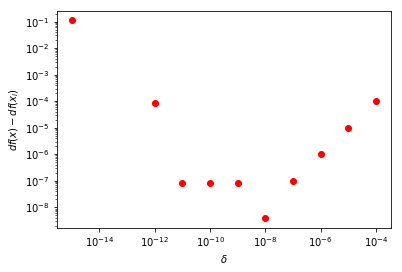

In [29]:
# Es 6
# derivata di funzione

# Es 6.1
print("Es 6.1\n")

def f(x):
    ris = x * (x - 1)
    return ris
#enddef

def deriv(f,x,eps):
    df = (f(x + eps) - f(x))/eps
    return df
#enddef

eps = 1e-14
x = 1

df = deriv(f,x,eps)
print("Derivata numerica in x = 1: ", df)

print("\n\nEs 6.2\n")
# Es 6.2

import matplotlib.pyplot as plt

accs = [1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14]
accs = [10**(-n) for n in range(4,16)]
dervs = [deriv(f,x,ee) for ee in accs]
print(dervs)

dervs = [dervsEl - 1 for dervsEl in dervs]

plt.loglog(accs, dervs, 'ro')
plt.xlabel('$\delta$')
plt.ylabel('$ df(x) - df(x_i) $')
plt.show()

**Answer b)**: Analytical and numerical values of the derivative disagree because of the ill conditioning of the problem (istability).

**Answer c)** Accuracy scales almost linearly before $10^{-8}$ then results become more and more inaccurate. This is believed to be due to the growing instability because of more precision in progressively taken into account, hence the more the accurate the value of the $\delta$, i.e. the more the values of the derivative itself that are worked are small, the more the result is inaccurate.

7\. Consider the integral of the semicircle of radius 1:
$$
I=\int_{-1}^{1} \sqrt(1-x^2) {\rm d}x
$$
which it's known to be $I=\frac{\pi}{2}=1.57079632679...$.
Alternatively we can use the Riemann definition of the integral:
$$
I=\lim_{N\to\infty} \sum_{k=1}^{N} h y_k 
$$

with $h=2/N$ the width of each of the $N$ slices the domain is divided into and where
$y_k$ is the value of the function at the $k-$th slice.

(a) Write a programe to compute the integral with $N=100$. How does the result compares to the true value?

(b) How much can $N$ be increased if the computation needs to be run in less than a second? What is the gain in running it for 1 minute? 


In [48]:
from math import sqrt
from math import pi
import time

print("Es 7.1\n")

def f(x):
    ris = sqrt(1 - x**2)
    return ris
#enddef

sum = 0.0
N = 100
x = -1
h = 2/N

start = time.time()
for i in range(1,N):
    sum += f(x) * h
    x += h
#enddo
finish = time.time()

print("Integrale numerico I = ",sum,". Valore esatto I = ",pi/2)
print("Errore eps = ", abs(sum - pi/2), " in ", finish-start," s.")

print("\n\nEs 7.2\n")

Dt = finish - start
M = int((60 / Dt) * 100)
#M = 10000000

print(M)

sum = 0.0
x = -1
h = 2/M
start = time.time()
for i in range(1,M):
    sum += f(x) * h
    x += 2/M
#enddo
finish = time.time()

print("Integrale numerico I = ",sum,". Valore esatto I = ",pi/2)
print("Errore eps = ", abs(sum - pi/2), " in ", finish-start," s.")

Es 7.1

Integrale numerico I =  1.565154305800823 . Valore esatto I =  1.5707963267948966
Errore eps =  0.0056420209940735155  in  7.987022399902344e-05  s.


Es 7.2

75121862
Integrale numerico I =  1.5707963261616746 . Valore esatto I =  1.5707963267948966
Errore eps =  6.332219193438959e-10  in  23.95644783973694  s.


We can increase $N$ to a value up to $10^{6}$ to keep computation time under 1 second. Even if program runs for fewer that 1 minute (20 seconds on average to run the time estimated in line 30), accuracy gain is of 7 orders of magnitude. The same is attained setting $M = 10^{7}$, which runs for approximately 3 seconds. Thus it can be infered that computation time scales almost linearly with orders of magnitude of number of loops. Infact we observe a linear trend by using progressively growing orders of magnitude for $M$.